             state  heart_disease  cluster
49         Wyoming       0.569892        0
36          Oregon       0.548246        0
17       Louisiana       0.546798        0
41       Tennessee       0.543011        0
8          Florida       0.534314        0
5         Colorado       0.530928        0
39  South Carolina       0.530387        0
19        Maryland       0.528302        0
4       California       0.528205        0
22       Minnesota       0.525253        0
Query execution time: 0.0893 seconds
Total rows returned: 50
Total columns returned: 3


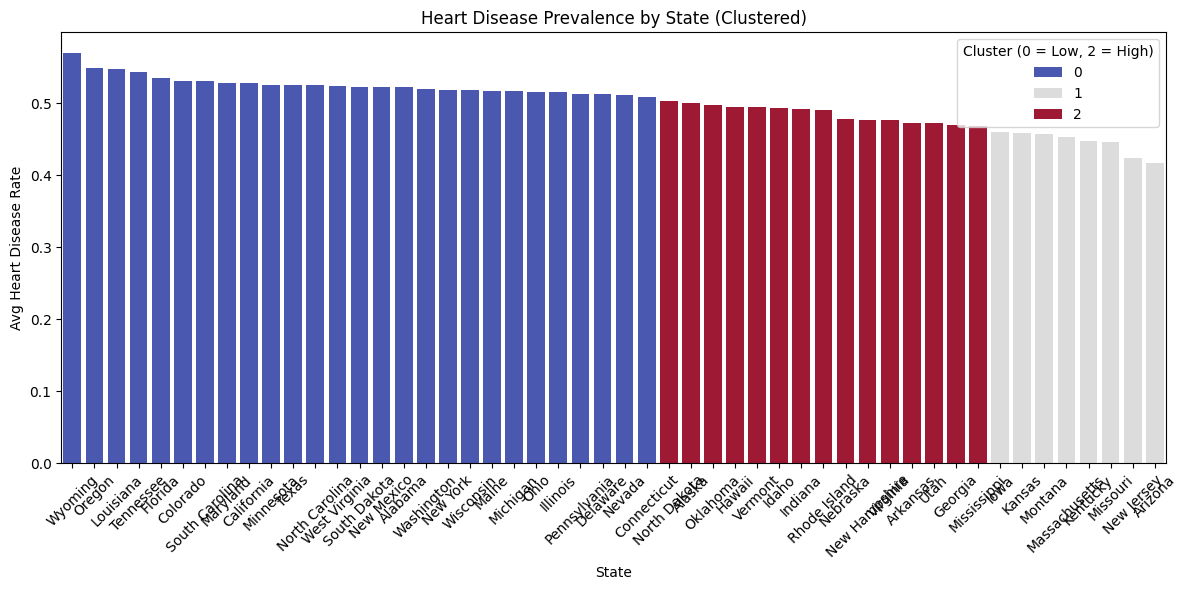

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import time

# Load the dataset
df = pd.read_csv("Heart_Disease_and_Hospitals.csv")

# Start timing the query execution
start_time = time.time()

# Make sure 'heart_disease' column is numeric
df["heart_disease"] = pd.to_numeric(df["heart_disease"], errors='coerce')

# Drop rows with missing state or heart_disease data
df = df.dropna(subset=["state", "heart_disease"])

# Group by state and calculate average heart disease rate
state_heart_disease = df.groupby("state")["heart_disease"].mean().reset_index()

# Run KMeans clustering (3 clusters: low, medium, high prevalence)
kmeans = KMeans(n_clusters=3, random_state=42)
state_heart_disease["cluster"] = kmeans.fit_predict(state_heart_disease[["heart_disease"]])

# End timing
end_time = time.time()

# Display result
print(state_heart_disease.sort_values(by="heart_disease", ascending=False).head(10))
print(f"Query execution time: {end_time - start_time:.4f} seconds")
print(f"Total rows returned: {state_heart_disease.shape[0]}")
print(f"Total columns returned: {state_heart_disease.shape[1]}")

# Visualize clusters with color
plt.figure(figsize=(12,6))
sns.barplot(data=state_heart_disease.sort_values(by="heart_disease", ascending=False),
            x="state", y="heart_disease", hue="cluster", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Avg Heart Disease Rate")
plt.title("Heart Disease Prevalence by State (Clustered)")
plt.legend(title="Cluster (0 = Low, 2 = High)")
plt.tight_layout()
plt.show()


             state  heart_disease cluster
49         Wyoming       0.569892       0
36          Oregon       0.548246       0
17       Louisiana       0.546798       0
41       Tennessee       0.543011       0
8          Florida       0.534314       0
5         Colorado       0.530928       0
39  South Carolina       0.530387       0
19        Maryland       0.528302       0
4       California       0.528205       0
22       Minnesota       0.525253       0
Query execution time: 0.0129 seconds
Total rows returned: 50
Total columns returned: 3


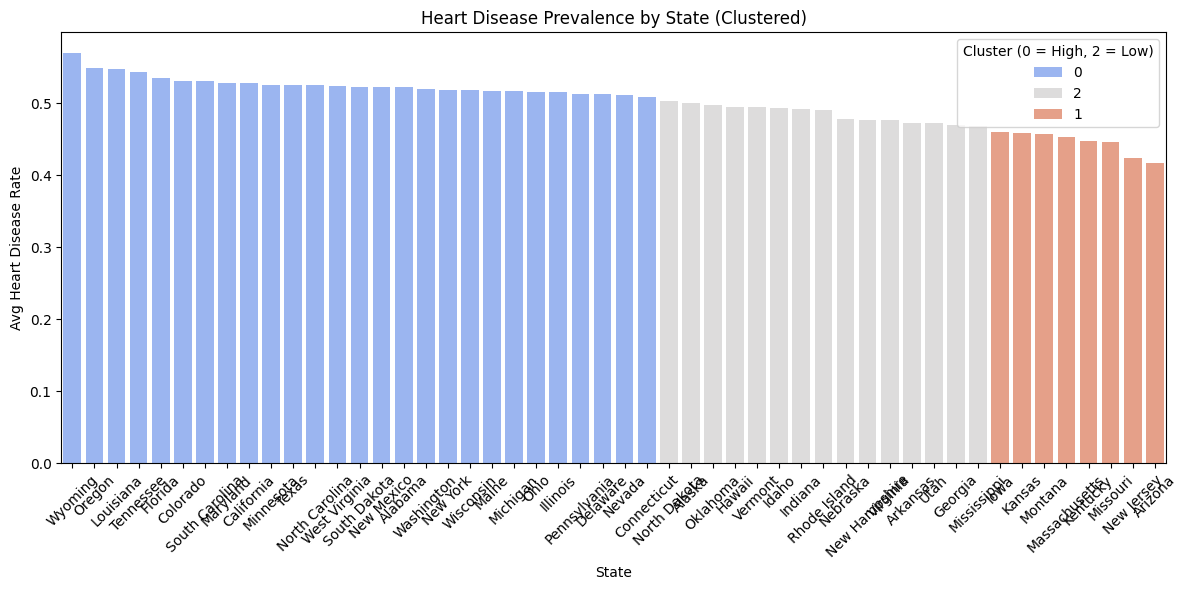

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import time

# Load the dataset
df = pd.read_csv("Heart_Disease_and_Hospitals.csv")

# Start timing the query execution
start_time = time.time()

# Make sure 'heart_disease' column is numeric
df["heart_disease"] = pd.to_numeric(df["heart_disease"], errors='coerce')

# Drop rows with missing state or heart_disease data
df = df.dropna(subset=["state", "heart_disease"])

# Group by state and calculate average heart disease rate
state_heart_disease = df.groupby("state")["heart_disease"].mean().reset_index()

# Run KMeans clustering (3 clusters: low, medium, high prevalence)
kmeans = KMeans(n_clusters=3, random_state=42)
state_heart_disease["cluster"] = kmeans.fit_predict(state_heart_disease[["heart_disease"]])

# Sort the clusters by the mean heart disease rate (so the highest prevalence gets Cluster 0)
cluster_order = state_heart_disease.groupby('cluster')['heart_disease'].mean().sort_values(ascending=False).index
state_heart_disease['cluster'] = pd.Categorical(state_heart_disease['cluster'], categories=cluster_order, ordered=True)

# End timing
end_time = time.time()

# Display result
print(state_heart_disease.sort_values(by="heart_disease", ascending=False).head(10))
print(f"Query execution time: {end_time - start_time:.4f} seconds")
print(f"Total rows returned: {state_heart_disease.shape[0]}")
print(f"Total columns returned: {state_heart_disease.shape[1]}")

# Visualize clusters with color
plt.figure(figsize=(12,6))
sns.barplot(data=state_heart_disease.sort_values(by="heart_disease", ascending=False),
            x="state", y="heart_disease", hue="cluster", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Avg Heart Disease Rate")
plt.title("Heart Disease Prevalence by State (Clustered)")
plt.legend(title="Cluster (0 = High, 2 = Low)")
plt.tight_layout()
plt.show()
